## Download the data

In [ ]:
! wget --header="Host: vaex.s3.us-east-2.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://vaex.io/docs/datasets.html" "https://vaex.s3.us-east-2.amazonaws.com/taxi/yellow_taxi_2015_f32s.hdf5" -c -O 'yellow_taxi_2015_f32s.hdf5'

--2021-01-02 04:28:53--  https://vaex.s3.us-east-2.amazonaws.com/taxi/yellow_taxi_2015_f32s.hdf5
Resolving vaex.s3.us-east-2.amazonaws.com (vaex.s3.us-east-2.amazonaws.com)... 52.219.101.114
Connecting to vaex.s3.us-east-2.amazonaws.com (vaex.s3.us-east-2.amazonaws.com)|52.219.101.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12857976625 (12G) [application/x-hdf]
Saving to: ‘yellow_taxi_2015_f32s.hdf5’

yellow_taxi_2015_f3 100%[===================>]  11.97G  34.8MB/s    in 4m 51s  

2021-01-02 04:33:44 (42.1 MB/s) - ‘yellow_taxi_2015_f32s.hdf5’ saved [12857976625/12857976625]



In [ ]:
! ls

sample_data  yellow_taxi_2015_f32s.hdf5


In [ ]:
import vaex
# from vaex.ui.colormaps import cm_plusmin

import numpy as np

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
%%time
import vaex
df = vaex.open('yellow_taxi_2015_f32s.hdf5')

CPU times: user 14.3 ms, sys: 1.27 ms, total: 15.6 ms
Wall time: 62.2 ms


In [ ]:
df

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2014-12-16 02:26:00.000000000,2014-12-16 02:28:00.000000000,1,CSH,1.090000033378601,-73.98672485351562,40.75642013549805,1.0,nan,-73.9964599609375,40.74289321899414,5.0,0.5,0.5,0.0,0.0,6.0
1,VTS,2014-12-15 18:23:00.000000000,2014-12-15 18:58:00.000000000,2,,6.28000020980835,-74.00418853759766,40.72119140625,1.0,nan,-73.97000122070312,nan,nan,nan,nan,nan,nan,nan
2,VTS,2015-01-15 19:05:39.000000000,2015-01-15 19:23:42.000000000,1,1,1.590000033378601,-73.993896484375,40.7501106262207,1.0,0.0,-73.97478485107422,40.75061798095703,12.0,1.0,0.5,3.25,0.0,17.049999237060547
3,CMT,2015-01-10 20:33:38.000000000,2015-01-10 20:53:28.000000000,1,1,3.299999952316284,-74.00164794921875,40.7242431640625,1.0,0.0,-73.99441528320312,40.75910949707031,14.5,0.5,0.5,2.0,0.0,17.799999237060547
4,CMT,2015-01-10 20:33:38.000000000,2015-01-10 20:43:41.000000000,1,2,1.7999999523162842,-73.96334075927734,40.80278778076172,1.0,0.0,-73.95182037353516,40.82441329956055,9.5,0.5,0.5,0.0,0.0,10.800000190734863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"146,112,986",VTS,2015-12-31 23:59:56.000000000,2016-01-01 00:08:18.000000000,5,1,1.2000000476837158,-73.99381256103516,40.72087097167969,1.0,0.0,-73.98621368408203,40.722469329833984,7.5,0.5,0.5,1.7599999904632568,0.0,10.5600004196167
"146,112,987",CMT,2015-12-31 23:59:58.000000000,2016-01-01 00:05:19.000000000,2,2,2.0,-73.96527099609375,40.76028060913086,1.0,0.0,-73.93951416015625,40.75238800048828,7.5,0.5,0.5,0.0,0.0,8.800000190734863
"146,112,988",CMT,2015-12-31 23:59:59.000000000,2016-01-01 00:12:55.000000000,2,2,3.799999952316284,-73.98729705810547,40.739078521728516,1.0,0.0,-73.9886703491211,40.69329833984375,13.5,0.5,0.5,0.0,0.0,14.800000190734863
"146,112,989",VTS,2015-12-31 23:59:59.000000000,2016-01-01 00:10:26.000000000,1,2,1.9600000381469727,-73.99755859375,40.72569274902344,1.0,0.0,-74.01712036132812,40.705322265625,8.5,0.5,0.5,0.0,0.0,9.800000190734863


In [ ]:
df.columns.keys()

dict_keys(['dropoff_datetime', 'dropoff_latitude', 'dropoff_longitude', 'fare_amount', 'mta_tax', 'passenger_count', 'payment_type', 'pickup_datetime', 'pickup_latitude', 'pickup_longitude', 'rate_code', 'store_and_fwd_flag', 'surcharge', 'tip_amount', 'tolls_amount', 'total_amount', 'trip_distance', 'vendor_id'])

In [ ]:
! pip install vaex

In [ ]:
# !pip install --upgrade python
# !pip uninstall ipython

ERROR: Could not find a version that satisfies the requirement python (from versions: none)
ERROR: No matching distribution found for python


In [ ]:
import vaex

In [ ]:
# !pip install --upgrade python
# ! pip install --upgrade vaex
!pip install --upgrade ipython
# !pip install vaex
# !pip install --upgrade ipython

Requirement already up-to-date: ipython in /usr/local/lib/python3.6/dist-packages (7.16.1)


In [ ]:
! ls

sample_data  yellow_taxi_2015_f32s.hdf5


## Various visualization with Vaex on huge data

In [ ]:
import vaex

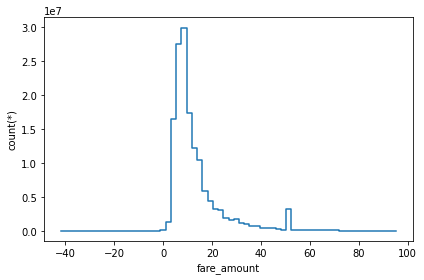

In [ ]:
df.plot1d(df.fare_amount, limits='99.7%');

In [ ]:
import pylab as plt

In [ ]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

[####################################----] 100.00% elapsed time  :     0.59s =  0.0m =  0.0h
 

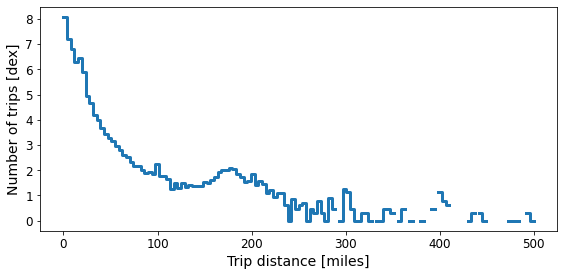

In [ ]:
# Plot the distribution of distances.
plt.figure(figsize=(8, 4))
df.plot1d('trip_distance', limits=[0, 500], f='log10', shape=128, lw=3, progress=True)
plt.xlabel('Trip distance [miles]')
plt.ylabel('Number of trips [dex]')
plt.show()

In [ ]:
# Define the boundaries by interactively choosing the area of interest!
long_min = -74.05
long_max = -73.75
lat_min = 40.58
lat_max = 40.90

# Make a selection based on the boundaries
df_filtered = df[(df.pickup_longitude > long_min)  & (df.pickup_longitude < long_max) & \
                 (df.pickup_latitude > lat_min)    & (df.pickup_latitude < lat_max) & \
                 (df.dropoff_longitude > long_min) & (df.dropoff_longitude < long_max) & \
                 (df.dropoff_latitude > lat_min)   & (df.dropoff_latitude < lat_max)]

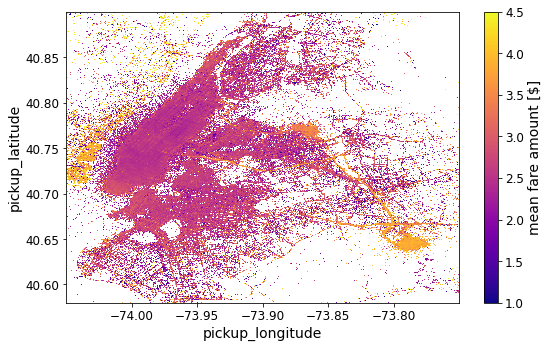

In [ ]:
plt.figure(figsize=(7, 5))

df_filtered.plot('pickup_longitude', 'pickup_latitude', what='mean(fare_amount)',
                 colormap='plasma', f='log1p', shape=512, colorbar=True, 
                 colorbar_label='mean fare amount [$]', vmin=1, vmax=4.5)

number of rows: 146,112,991
number of columns: 18


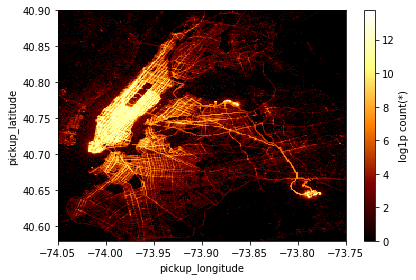

CPU times: user 2.22 s, sys: 159 ms, total: 2.38 s
Wall time: 1.3 s


In [ ]:
%%time
import vaex
import warnings; warnings.filterwarnings("ignore")

df = vaex.open('yellow_taxi_2015_f32s.hdf5')

print(f'number of rows: {df.shape[0]:,}')
print(f'number of columns: {df.shape[1]}')

long_min = -74.05
long_max = -73.75
lat_min = 40.58
lat_max = 40.90

df.plot(df.pickup_longitude, df.pickup_latitude, f="log1p", limits=[[-74.05, -73.75], [40.58, 40.90]], show=True);